In [1]:
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from matplotlib import colors

C:\Users\Lennart Pc\AppData\Local\Temp\ipykernel_15876\1188840077.py:52: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


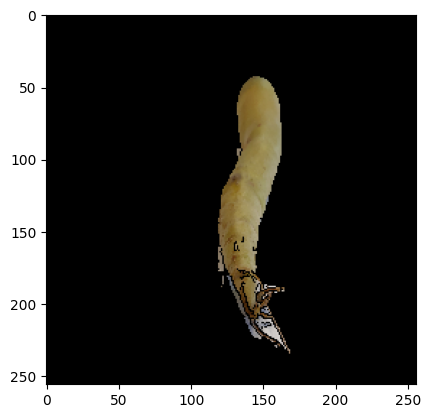

In [27]:
def oval_zeichnen(Adresse=""):

    

    

    con_area=[]
    img = cv2.imread(Adresse)
    edges=[]
    if img is not None:

        img = cv2.resize(img, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)
        ori= img.reshape((-1,3))
        ori= np.float32(ori)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


        ret, binary = cv2.threshold(gray, 120, 250, cv2.ADAPTIVE_THRESH_GAUSSIAN_C)

        img_box = np.zeros((256,256,3), np.uint8)
        img_box=np.copy(img)

    #Canny edges
        edges=cv2.Canny(img,120,256)
        blank_image = np.zeros((256,256,3), np.uint8)
        for i in range(len(edges)):
            for j in range(len(edges[i])):
                if edges[i][j] !=0:
                    blank_image[i][j]=[255,255,255]
    





        contour, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


        for j in range(len(contour)):
            con_area.append(cv2.contourArea(contour[j]))
        
        max_area= np.max(con_area)

          
        con=contour[con_area.index(max_area)]
    
        for i in range(len(contour)):

       
            rect = cv2.minAreaRect(con)
            box = cv2.boxPoints(rect)
            box = np.int0(box)
            cv2.drawContours(img_box,[box],0,(0,0,255),1)

            x,y,w,h = cv2.boundingRect(con)
            cv2.rectangle(img_box,(x,y),(x+w,y+h),(255,255,0),1)


        cv2.drawContours(img_box,con,-1,(0,0,255),1)
        if len(con) >=5:
            ellipse = cv2.fitEllipse(con)
            cv2.ellipse(img_box,ellipse,(255,0,0),2)

        new=img[(y):(y+h), (x):(x+w)]


        ori= new.reshape((-1,3))
        ori= np.float32(ori)


        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
        K = 2
        attempts=10

        ret, label, center=cv2.kmeans(ori, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
        center = np.uint8(center)
        res = center[label.flatten()]

        result_image = res.reshape((new.shape))



        
    return img, edges


def fill(edges=[],img=[]):

    if img is not None:
        pic1 = np.zeros((256,256,3), np.uint8)
        pic2 = np.zeros((256,256,3), np.uint8)
        pic3 = np.zeros((256,256,3), np.uint8)
        pic4 = np.zeros((256,256,3), np.uint8)
    #links>rects
        for i in range((len(edges)-1)):
            for j in range(len(edges[i])-1):
                
                if edges[i][j]!=0:
                    a=i
                    b=j+1
                    while edges[a][b]==0 and b<255:
                        pic1[a][b]=img[a][b]
                        b=b+1

            for j in range((len(edges[i])-1),0,-1):
                
                    if edges[i][j]!=0:
                        a=i
                        b=j-1
                        while edges[a][b]==0 and b>0 and a>0:
                            pic3[a][b]=img[a][b]
                            b=b-1  

    #oben>unten
        for i in range((len(edges)-1)):
            for j in range((len(edges[i])-1)):
                
                if edges[j][i]!=0:
                    a=i
                    b=j+1
                    while edges[b][a]==0 and b<255:
                        pic2[b][a]=img[b][a]
                        b=b+1 

            for j in range((len(edges[i])-1),0,-1):
                
                if edges[j][i]!=0:
                    a=i
                    b=j-1
                    while edges[b][a]==0 and b>0 and a>0:
                        pic4[b][a]=img[b][a]
                        b=b-1    

    

        
        for i in range(len(pic1)):
            for j in range(len(pic1[i])):
                if pic2[i][j].all()==0:
                    pic1[i][j]=pic2[i][j]
                if pic3[i][j].all()==0:
                    pic1[i][j]=pic3[i][j]
                if pic4[i][j].all()==0:
                    pic1[i][j]=pic4[i][j]



        return pic1

       

#Adresse="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/Bilderdrive/Kartoffel_trieb/kartoffel_trieb_("+str(2)+").jpeg"
Adresse="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/Bilderdrive/Karotte/karotte_("+str(100)+").jpg"
speichern=".jpg"

img, edges=oval_zeichnen(Adresse)

pic=fill(edges,img)
if pic is not None:
    pic=cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    plt.imshow(pic)
else:
    print("kei Bild mit der Adressierung "+str(i)+" vorhanden")


In [45]:
for i in range(1,300):
    Adresse="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/Bilderdrive/Karotte/karotte_("+str(i)+").jpg"
    speichern="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/BildermitOval/karotte_Oval/karotte_mitoval"+str(i)+".jpg"


    img, edges=oval_zeichnen(Adresse)
    pic=fill(edges,img)
    if  pic is not None:
        cv2.imwrite(speichern,pic)

C:\Users\Lennart Pc\AppData\Local\Temp\ipykernel_15408\20222756.py:52: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


In [28]:
for i in range(1,300):
    Adresse="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/Bilderdrive/Kartoffel/kartoffel_("+str(i)+").jpg"
    speichern="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/BildermitOval/kartoffel_Oval/kartoffel_mitoval"+str(i)+".jpg"


    img, edges=oval_zeichnen(Adresse)
    pic=fill(edges,img)
    if  pic is not None:
        cv2.imwrite(speichern,pic)

C:\Users\Lennart Pc\AppData\Local\Temp\ipykernel_15876\1188840077.py:52: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


In [56]:
for i in range(1,300):
    Adresse="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/Bilderdrive/Zwiebel/zwiebel_("+str(i)+").jpg"
    speichern="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/BildermitOval/zwiebel_Oval/zwiebel_mitoval"+str(i)+".jpg"


    img, edges=oval_zeichnen(Adresse)
    pic=fill(edges,img)
    if  pic is not None:
        cv2.imwrite(speichern,pic)

C:\Users\Lennart Pc\AppData\Local\Temp\ipykernel_15408\1188840077.py:52: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


In [64]:
for i in range(1,300):
    Adresse="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/Bilderdrive/Kartoffel_trieb/kartoffel_trieb_("+str(i)+").jpeg"
    speichern="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/BildermitOval/kartoffel_trieb_Oval/kartoffel_trieb_mitoval_("+str(i)+").jpg"


    img, edges=oval_zeichnen(Adresse)
    pic=fill(edges,img)
    if  pic is not None:
        cv2.imwrite(speichern,pic)

C:\Users\Lennart Pc\AppData\Local\Temp\ipykernel_15408\1188840077.py:52: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


0.5
11.5
43.0
8.0
12.5
4.0
58.5


C:\Users\Lennart Pc\AppData\Local\Temp\ipykernel_16224\834051098.py:61: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


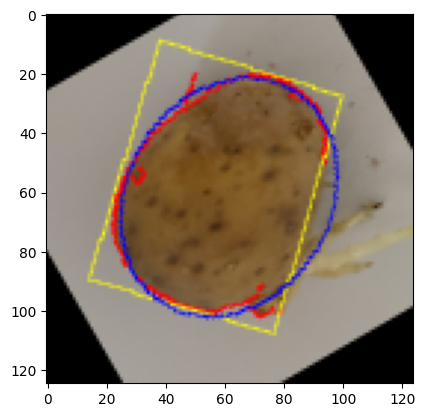

In [8]:
#Adresse="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/Bilderdrive/Karotte/karotte_(66).jpg"
#Adresse="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/Bilderdrive/Zwiebel/zwiebel_(100).jpg"
#Adresse="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/Bilderdrive/Kartoffel/kartoffel_(42).jpg"
Adresse="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/Bilderdrive/Kartoffel_trieb/kartoffel_trieb_(30).jpeg"
img = cv2.imread(Adresse)
img = cv2.resize(img, dsize=(256, 256), interpolation=cv2.INTER_AREA)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#cv2.imshow("original",img)
#cv2.imshow("gray",gray)
ret, binary = cv2.threshold(gray,120, 256, cv2.ADAPTIVE_THRESH_GAUSSIAN_C)
#cv2.imshow("Binary image", binary)

            


edges=cv2.Canny(gray,50,200)
blank_image = np.zeros((256,256,3), np.uint8)
for i in range(len(edges)):
    for j in range(len(edges[i])):
        if edges[i][j] !=0:
            0
            #blank_image[i][j]=img[i][j]
            #img[i][j]=[0,0,0]


contour, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for i in contour:
    area=cv2.contourArea(i)

    if area >=100 and area <=10000:
         
        rect = cv2.minAreaRect(i)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        #cv2.drawContours(img,[box],0,(0,0,255),1)
        #print(i)
        if len(i) >=5:
            ellipse = cv2.fitEllipse(i)
            #cv2.ellipse(img,ellipse,(255,0,0),1)
    if area >=50:

        x,y,w,h = cv2.boundingRect(i)
        #cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),1)
    
new_img=img[y-20:(y+h+20),x-20:(x+w+20)]

new_gray= cv2.cvtColor(new_img,cv2.COLOR_BGR2GRAY)
new_edges=cv2.Canny(new_gray,50,200)
ret, new_binary = cv2.threshold(new_gray, 120, 200, cv2.ADAPTIVE_THRESH_GAUSSIAN_C)

new_contour, hierarchy = cv2.findContours(new_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for i in new_contour:
    area=cv2.contourArea(i)
    print(area)
    if area >= 50:
         
        rect = cv2.minAreaRect(i)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        cv2.drawContours(new_img,[i],0,(0,0,255),1)
        cv2.drawContours(new_img,[box],0,(0,255,255),1)
        #print(i)
        if len(i) >=5:
            ellipse = cv2.fitEllipse(i)
            cv2.ellipse(new_img,ellipse,(255,0,0),1)
            
    if area >=70:

        x,y,w,h = cv2.boundingRect(i)
        #cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),1)
for i in range(len(edges)):
    for j in range(len(edges[i])):
        if edges[i][j] !=0:  
            0
            ##img[i][j]=[0,0,0]


(h, w) = new_img.shape[:2]
center = (w / 2, h / 2)
angle = 30
scale = 1

M = cv2.getRotationMatrix2D(center, angle, scale)
rotated = cv2.warpAffine(new_img, M, (w, h))



#cv2.imshow("canny",blank_image)
img=cv2.cvtColor(rotated,cv2.COLOR_BGR2RGB)
plt.imshow(img)
#print(edges)






cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
contour

(array([[[135, 190]],
 
        [[136, 190]],
 
        [[137, 191]],
 
        [[137, 193]],
 
        [[137, 191]],
 
        [[136, 190]]], dtype=int32),
 array([[[  0, 189]],
 
        [[  1, 189]],
 
        [[  2, 190]],
 
        [[  1, 191]],
 
        [[  0, 191]],
 
        [[  1, 191]],
 
        [[  2, 192]],
 
        [[  4, 192]],
 
        [[  6, 194]],
 
        [[  7, 194]],
 
        [[  8, 195]],
 
        [[ 10, 195]],
 
        [[ 11, 196]],
 
        [[ 12, 196]],
 
        [[ 13, 197]],
 
        [[ 14, 197]],
 
        [[ 15, 198]],
 
        [[ 17, 198]],
 
        [[ 18, 199]],
 
        [[ 19, 199]],
 
        [[ 20, 200]],
 
        [[ 23, 200]],
 
        [[ 24, 201]],
 
        [[ 25, 201]],
 
        [[ 24, 201]],
 
        [[ 23, 200]],
 
        [[ 20, 200]],
 
        [[ 18, 198]],
 
        [[ 16, 198]],
 
        [[ 15, 197]],
 
        [[ 14, 197]],
 
        [[ 13, 196]],
 
        [[ 14, 195]],
 
        [[ 16, 195]],
 
        [[ 17, 196]],
 
   

In [3]:
#Schwarzer Hintergrnd
blank_image = np.zeros((256,256,3), np.uint8)
for i in range(len(binary)):
    for j in range(len(binary[i])):
        if binary[i][j] !=0:
            blank_image[i][j]=img[i][j]

color=np.unique(blank_image,return_counts=False)

Anzahl_Farben=len(color)
print(Anzahl_Farben)

cv2.imshow("Black backround",blank_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

190


In [16]:
#Anzahl der Farben im Karotte Zählen
Farben_karotte=[]
r_dif=[]
g_dif=[]
b_dif=[]
for i in range(1,248):
    Adresse="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/Bilderdrive/Karotte/karotte_("+str(i)+").jpg"
    #Adresse="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/Bilderdrive/Zwiebel/zwiebel_("+str(i)+").jpg"
    #Adresse="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/Bilderdrive/Kartoffel/kartoffel_("+str(i)+").jpg"
    img = cv2.imread(Adresse)
    img = cv2.resize(img, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, binary = cv2.threshold(gray, 150, 200, cv2.ADAPTIVE_THRESH_GAUSSIAN_C)
    laplacian = cv2.Laplacian(binary,cv2.CV_64F)
    
    blank_image = np.zeros((256,256,3), np.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    for i in range(len(binary)):
        for j in range(len(binary[i])):
            if binary[i][j] !=0:
                blank_image[i][j]=img[i][j]

    r,g,b=cv2.split(blank_image)

    color=np.unique(blank_image,return_counts=False)
    Anzahl_Farben=len(color)
    Farben_karotte.append(Anzahl_Farben)

    r_dif.append(len(np.unique(r,return_counts=False)))
    g_dif.append(len(np.unique(g,return_counts=False)))
    b_dif.append(len(np.unique(b,return_counts=False)))





In [70]:
#Anzahl der Farben im Kartoffel Zählen
Farben_kartoffel=[]
r_dif=[]
g_dif=[]
b_dif=[]
for i in range(1,184):
    #Adresse="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/Bilderdrive/Karotte/karotte_("+str(i)+").jpg"
    #Adresse="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/Bilderdrive/Zwiebel/zwiebel_("+str(i)+").jpg"
    Adresse="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/Bilderdrive/Kartoffel/kartoffel_("+str(i)+").jpg"
    img = cv2.imread(Adresse)
    img = cv2.resize(img, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, binary = cv2.threshold(gray, 150, 200, cv2.ADAPTIVE_THRESH_GAUSSIAN_C)
    laplacian = cv2.Laplacian(binary,cv2.CV_64F)
    
    blank_image = np.zeros((256,256,3), np.uint8)

    for i in range(len(binary)):
        for j in range(len(binary[i])):
            if binary[i][j] !=0:
                blank_image[i][j]=img[i][j]

    color=np.unique(blank_image,return_counts=False)
    Anzahl_Farben=len(color)
    Farben_kartoffel.append(Anzahl_Farben)
    
    r,g,b=cv2.split(blank_image)

    r_dif.append(len(np.unique(r,return_counts=False)))
    g_dif.append(len(np.unique(g,return_counts=False)))
    b_dif.append(len(np.unique(b,return_counts=False)))


In [72]:
#Anzahl der Farben im Karotte Zählen
Farben_zwiebel=[]
r_dif=[]
g_dif=[]
b_dif=[]
for i in range(1,192):
    #Adresse="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/Bilderdrive/Karotte/karotte_("+str(i)+").jpg"
    Adresse="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/Bilderdrive/Zwiebel/zwiebel_("+str(i)+").jpg"
    #Adresse="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/Bilderdrive/Kartoffel/kartoffel_("+str(i)+").jpg"
    img = cv2.imread(Adresse)
    img = cv2.resize(img, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, binary = cv2.threshold(gray, 150, 200, cv2.ADAPTIVE_THRESH_GAUSSIAN_C)
    laplacian = cv2.Laplacian(binary,cv2.CV_64F)
    
    blank_image = np.zeros((256,256,3), np.uint8)

    for i in range(len(binary)):
        for j in range(len(binary[i])):
            if binary[i][j] !=0:
                blank_image[i][j]=img[i][j]

    color=np.unique(blank_image,return_counts=False)
    Anzahl_Farben=len(color)
    Farben_zwiebel.append(Anzahl_Farben)

    r,g,b=cv2.split(blank_image)
    r_dif.append(len(np.unique(r,return_counts=False)))
    g_dif.append(len(np.unique(g,return_counts=False)))
    b_dif.append(len(np.unique(b,return_counts=False)))


Text(0.5, 1.0, 'zwiebel')

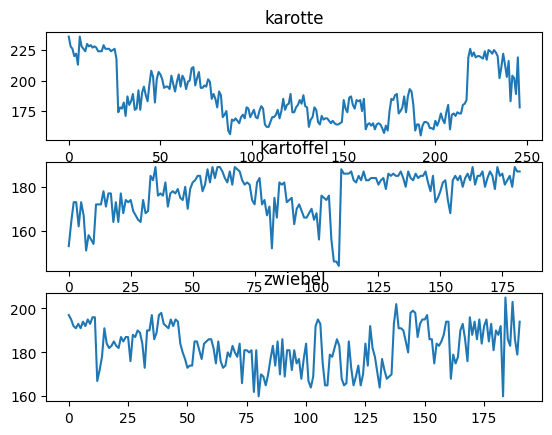

In [73]:
karotte_plot=plt.subplot(3,1,1)
kartoffel_plot=plt.subplot(3,1,2)
zwiebel_plot=plt.subplot(3,1,3)
karotte_plot.plot(Farben_karotte)
karotte_plot.set_title("karotte")
kartoffel_plot.plot(Farben_kartoffel)
kartoffel_plot.set_title("kartoffel")
zwiebel_plot.plot(Farben_zwiebel)
zwiebel_plot.set_title("zwiebel")

In [12]:
y=0
x=0
w=255
h=255
counter=0
index_object=0
#Bilder einlesen

Adresse="C:/Users/Lennart Pc/Pictures/karotte/karotte_"+str(40)+".jpg"
img = cv2.imread(Adresse)
img = cv2.resize(img, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, binary = cv2.threshold(gray, 150, 156, cv2.ADAPTIVE_THRESH_GAUSSIAN_C)
laplacian = cv2.Laplacian(binary,cv2.CV_64F)


for i in range(len(laplacian)):
    for j in range(len(laplacian)):
        if laplacian[i][j]!= 0.0 and y==0:
            y=i
            index_object=1
        
        if laplacian[i][j]==0.0 and index_object==1:
            counter=counter+1
    

    if counter == 256 and index_object==1:
        h=i
        index_object=0
        
    else:
        counter=0
        
counter=0

            
        

for i in range(len(laplacian)):
    for j in range(len(laplacian)):
        if laplacian[j][i]!= 0.0 and x==0:
            x=i
            index_object=1
        if laplacian[j][i]==0.0 and index_object==1:
            counter=counter+1

    if counter == 256 and index_object==1:
        w=i
        index_object=0
        
    else:
        counter=0
            
print(x,y,w,h)
img = cv2.rectangle(img,(x,y),(w,h),(0,255,0),1)
cv2.imshow("Black backround",img)
cv2.imshow("Binary", binary)
cv2.imshow("laplacian image", laplacian)
cv2.waitKey(00)
cv2.destroyAllWindows()

92 71 158 169


[194313   2295]


C:\Users\Lennart Pc\AppData\Local\Temp\ipykernel_1308\3716650893.py:50: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


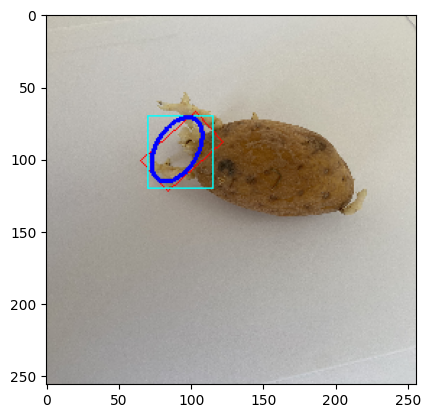

In [30]:
#Adresse="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/Bilderdrive/Karotte/karotte_(10).jpg"
#Adresse="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/Bilderdrive/Zwiebel/zwiebel_(100).jpg"
#Adresse="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/Bilderdrive/Kartoffel/kartoffel_(25).jpg"
Adresse="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/Bilderdrive/Kartoffel_trieb/kartoffel_trieb_(2).jpeg"


con_area=[]
img = cv2.imread(Adresse)
img = cv2.resize(img, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)
ori= img.reshape((-1,3))
ori= np.float32(ori)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#cv2.imshow("original",img)

ret, binary = cv2.threshold(gray, 120, 250, cv2.ADAPTIVE_THRESH_GAUSSIAN_C)

img_box = np.zeros((256,256,3), np.uint8)
img_box=np.copy(img)

#Canny edges
edges=cv2.Canny(img,120,256)
blank_image = np.zeros((256,256,3), np.uint8)
for i in range(len(edges)):
    for j in range(len(edges[i])):
        if edges[i][j] !=0:
            blank_image[i][j]=[255,255,255]
#cv2.imshow("canny",blank_image)





contour, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


for j in range(len(contour)):
    con_area.append(cv2.contourArea(contour[j]))
    
max_area= np.max(con_area)

          #Kontur einzeichnen
con=contour[con_area.index(max_area)]
#Boundingbox mit min Inhalt
for i in range(len(contour)):

    #con=contour[i]
    #print(con)
    rect = cv2.minAreaRect(con)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    cv2.drawContours(img_box,[box],0,(0,0,255),1)

    x,y,w,h = cv2.boundingRect(con)
    cv2.rectangle(img_box,(x,y),(x+w,y+h),(255,255,0),1)
#print(len(contour))
if len(con) >=5:
    ellipse = cv2.fitEllipse(con)
    cv2.ellipse(img_box,ellipse,(255,0,0),2)

new=img[(y):(y+h), (x):(x+w)]


ori= new.reshape((-1,3))
ori= np.float32(ori)


criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
attempts=10

ret, label, center=cv2.kmeans(ori, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]

result_image = res.reshape((new.shape))



un,coun=np.unique(blank_image,return_counts=True)
print(coun)

result_image=cv2.cvtColor(result_image,cv2.COLOR_BGR2RGB)

#edge.imshow(edges,cmap="gray")
img_box=cv2.cvtColor(img_box,cv2.COLOR_BGR2RGB)
plt.imshow(img_box)


#cv2.imshow("image", img)
#cv2.waitKey(00)
#cv2.destroyAllWindows()


In [31]:
#Boundingbox in Ordner einzeichnen
for i in range(1,300):
    
    #Bilder einlesen
    Adresse="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/Bilderdrive/Karotte/karotte_("+str(i)+").jpg"
    #Adresse="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/Bilderdrive/Kartoffel/kartoffel_("+str(i)+").jpg"
    #Adresse="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/Bilderdrive/Zwiebel/zwiebel_("+str(i)+").jpg"
    
    img = cv2.imread(Adresse)
    if img is not None: 
        
        img = cv2.resize(img, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ret, binary = cv2.threshold(gray, 150, 156, cv2.ADAPTIVE_THRESH_GAUSSIAN_C)
        laplacian = cv2.Laplacian(binary,cv2.CV_64F)
        con_area=[]
        
        #Konturen finden
        contour, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        

        #größte Kontur ausfiltern
        for j in range(len(contour)):
            con_area.append(cv2.contourArea(contour[j]))
    
        max_area= np.max(con_area)

        
        #Kontur einzeichnen
        con=contour[con_area.index(max_area)]
        if len(con) >=5:
            ellipse = cv2.fitEllipse(con)
            cv2.ellipse(img,ellipse,(255,0,0),2)
        rect = cv2.minAreaRect(con)
        box = cv2.boxPoints(rect)
        box = np.intp(box)
        cv2.drawContours(img,[box],0,(0,0,255),1)

        detected_circles = cv2.HoughCircles(gray,  
                   cv2.HOUGH_GRADIENT, 1, 20, param1 = 50, 
               param2 = 30, minRadius = 1, maxRadius = 40) 


        if detected_circles is not None: 
  
    
            detected_circles = np.uint16(np.around(detected_circles)) 
  
            for pt in detected_circles[0, :]: 
                a, b, r = pt[0], pt[1], pt[2] 
  
                # Draw the circumference of the circle. 
                cv2.circle(img, (a, b), r, (0, 255, 0), 2) 
  
                # Draw a small circle (of radius 1) to show the center. 
                cv2.circle(img, (a, b), 1, (0, 0, 0), 1) 



        saveadresse="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/BildermitKreis/karotte_kreis/karotte_mitkreis"+str(i)+".jpg"
        cv2.imwrite(saveadresse,img,)

    
        
    

In [21]:

farben=[]
reds=[]
greens=[]
blues=[]
for i in range(1,248):
    Adresse="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/Bilderdrive/Karotte/karotte_("+str(i)+").jpg"
    #Adresse="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/Bilderdrive/Zwiebel/zwiebel_("+str(i)+").jpg"
    #Adresse="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/Bilderdrive/Kartoffel/kartoffel_("+str(i)+").jpg"
    img = cv2.imread(Adresse)
    img = cv2.resize(img, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, binary = cv2.threshold(gray, 150, 156, cv2.ADAPTIVE_THRESH_GAUSSIAN_C)
    laplacian = cv2.Laplacian(binary,cv2.CV_64F)
    onion_2D = img.reshape((-1,3)) #rgb
    onion_2D = np.float32(onion_2D)
    blank_image = np.zeros((256,256,3), np.uint8)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 2
    attempts=10

    ret, label, center=cv2.kmeans(onion_2D, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]


    result_image = res.reshape((img.shape))

   
    

    result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
    #pic=plt.imshow(result_image)

    r,g,b=cv2.split(result_image)

    reds.append(np.unique(r,return_counts=False))
    greens.append(np.unique(g,return_counts=False))
    blues.append(np.unique(b,return_counts=False))

    




KeyboardInterrupt: 

In [31]:
reds_k=reds
greens_k=greens
blues_k=blues  

In [33]:
reds_z=reds
greens_z=greens
blues_z=blues 

In [34]:
reds_ka=reds
greens_ka=greens
blues_ka=blues



rgb


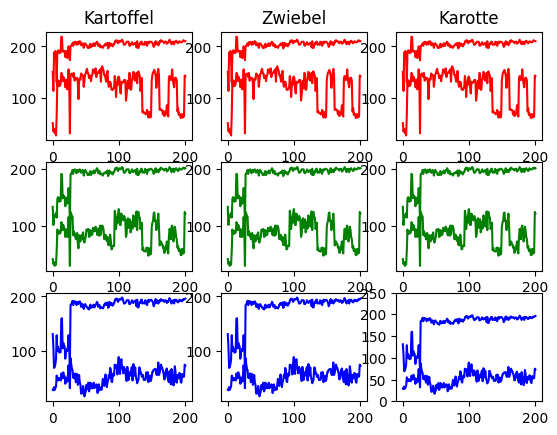

In [35]:
redplot_k=plt.subplot(3,3,1)
greenplot_k=plt.subplot(3,3,4)
blueplot_k=plt.subplot(3,3,7)
redplot_k.plot(reds_k,color="red")
greenplot_k.plot(greens_k,color="green")
blueplot_k.plot(blues_k,color="blue")
redplot_k.set_title("Kartoffel")

redplot_z=plt.subplot(3,3,2)
greenplot_z=plt.subplot(3,3,5)
blueplot_z=plt.subplot(3,3,8)
redplot_z.plot(reds_z,color="red")
greenplot_z.plot(greens_z,color="green")
blueplot_z.plot(blues_z,color="blue")
redplot_z.set_title("Zwiebel")

redplot_ka=plt.subplot(3,3,3)
greenplot_ka=plt.subplot(3,3,6)
blueplot_ka=plt.subplot(3,3,9)
redplot_ka.plot(reds_ka,color="red")
greenplot_ka.plot(greens_ka,color="green")
blueplot_ka.plot(blues_ka,color="blue")
redplot_ka.set_title("Karotte")

print("rgb")
plt.yticks(np.arange(0,256,50))
plt.show()

[[  0   0   0]
 [ 26  71 108]
 [ 52  95 130]
 [116 150 164]
 [ 11  55  91]
 [107 126 138]
 [ 77 103 122]
 [ 20  51  78]
 [ 47  74  99]
 [181 187 189]
 [ 36  77 112]
 [  0   0  15]
 [ 83 122 147]
 [ 33  69 102]
 [135 164 175]
 [ 47  82 114]
 [ 61 103 135]
 [ 68 112 145]
 [  6  43  76]
 [ 36  63  87]
 [ 95 136 157]
 [ 25  62  95]
 [ 66  91 111]
 [ 10  33  54]
 [ 18  63 100]
 [ 96 115 128]
 [  1   0   4]
 [ 78 110 135]
 [ 53  90 123]
 [ 41  85 122]]


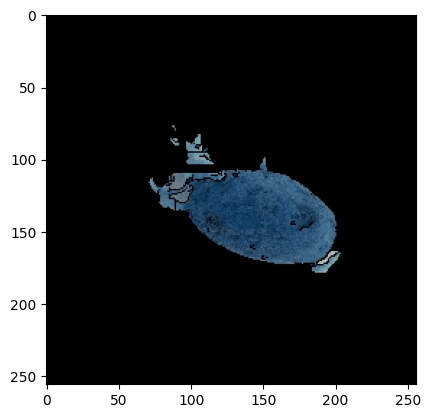

[[  0   0   0]
 [ 77 120 151]
 [ 64  85 107]
 [116 106 105]
 [ 61 100 132]
 [ 76 104 129]
 [124 115 115]
 [ 44  83 118]
 [ 97  85  85]
 [ 54 107 145]
 [ 89 118 143]
 [ 68 116 149]
 [ 66 106 138]
 [ 99 126 149]
 [ 93 136 165]
 [ 72  97 120]
 [ 86 103 120]
 [  0   0   8]
 [ 98 113 127]
 [ 43  99 140]
 [ 31  58  84]
 [139 137 138]
 [ 73 112 143]
 [ 84 110 134]
 [ 52  93 127]
 [ 83 126 157]
 [ 54  76  99]
 [  3   1   1]
 [111  97  96]
 [ 62  92 119]]


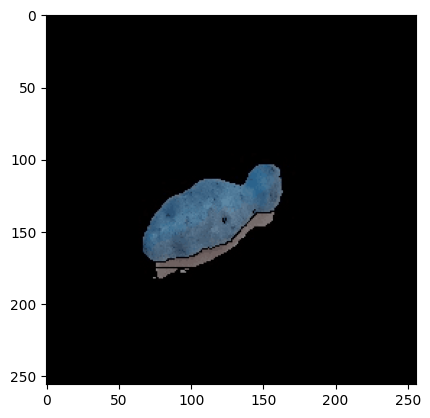

62
[array([181764,   1344,    672,    288,     25,     84,     94,    168,
          159,     25,    278,    136,    112,    301,    138,    322,
          240,    362,    233,    281,    320,    242,    139,    163,
          136,    229,    188,    575,     93,    212,    278,    139,
          297,    218,    519,    206,    295,    188,    240,     93,
          210,    356,    257,    136,    694,    105,    250,    261,
          297,    278,    295,     61,     16,    317,     16,     84,
          403,     94,    201,    233,    187,     61], dtype=int64)]


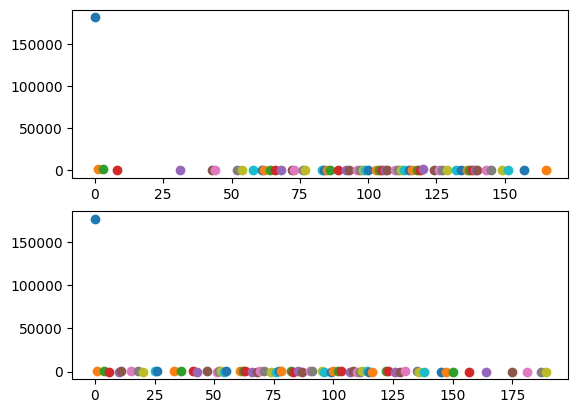

In [95]:
#Adresse="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/Bilderdrive/Karotte/karotte_("+str(100)+").jpg"
#Adresse="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/Bilderdrive/Zwiebel/zwiebel_("+str(100)+").jpg"
Adresse="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/BildermitOval/kartoffel_trieb_Oval/kartoffel_trieb_mitoval"+str(100)+".jpg"
#Adresse="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/BildermitOval/kartoffel_Oval/kartoffel_mitoval"+str(100)+".jpg"
img = cv2.imread(Adresse)
img = cv2.resize(img, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)



def get_main_color(img=[],colors=[],counts=[]):
    onion_2D = img.reshape((-1,3)) #rgb
    onion_2D = np.float32(onion_2D)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 30
    attempts=10
    ret, label, center=cv2.kmeans(onion_2D, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    result_image = res.reshape((img.shape))
    ergebnis_pic, counts_pic =np.unique(result_image,return_counts=True)
 
    colors.append(ergebnis_pic)
    counts.append(counts_pic)
    print(center)
    plt.imshow(result_image)
    plt.show()
    return colors, counts, result_image

ergebnis_trieb=[]
counts_trieb=[]

ergebnis=[]
counts=[]

for i in range(1,2):
    Adresse="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/BildermitOval/kartoffel_trieb_Oval/kartoffel_trieb_mitoval"+str(i)+".jpg"
    img = cv2.imread(Adresse)
    img = cv2.resize(img, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ergebnis_trieb, counts_trieb, null=get_main_color(img,ergebnis_trieb, counts_trieb)

for i in range(1,2):
    Adresse="D:/Dokumente/Master-Studium/Semester3/KI_Projekt/BildermitOval/kartoffel_Oval/kartoffel_mitoval"+str(i)+".jpg"
    img2 = cv2.imread(Adresse)
    img2 = cv2.resize(img2, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)
    ergebnis, counts, null2=get_main_color(img2,ergebnis, counts)
    



plot_ohne=plt.subplot(2,1,1)
plot_trieb=plt.subplot(2,1,2)

print(len(ergebnis[0]))
print(counts)

plot_trieb.plot(ergebnis_trieb,counts_trieb, "o")
plot_ohne.plot( ergebnis, counts, "o")
